# Data Exploration Notebook

_For USD-599 Capstone Project by Hunter Blum, Kyle Esteban Dalope, and Nicholas Lee (Summer 2023)_

***

**Content Overview:**
1. Table Features
> Examining the dimension and features of each quarterly data scrape alone and when joined together.

> Dropping duplicates (keeping only most recent values) and and re-examining table features and dimensions.

In [1]:
# Library Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import seaborn as sns

In [2]:
# Read in listings tables
june2022_listings_df = pd.read_csv("../Data/2022_06_june_listings.csv.gz", compression = "gzip")
sept2022_listings_df = pd.read_csv("../Data/2022_09_sept_listings.csv.gz", compression = "gzip")
dec2022_listings_df = pd.read_csv("../Data/2022_12_dec_listings.csv.gz", compression = "gzip")
mar2023_listings_df = pd.read_csv("../Data/2023_03_mar_listings.csv.gz", compression = "gzip")

# Sample Table
june2022_listings_df.head(5)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,53661776,https://www.airbnb.com/rooms/53661776,20220615002624,2022-06-15,2 bedrooms/ 1 bath - Upstairs - Near Lake Hodges,This listing consists of 2 bedrooms and 1 bath...,The neighborhood is very quiet and peaceful.,https://a0.muscache.com/pictures/miso/Hosting-...,62320777,https://www.airbnb.com/users/show/62320777,...,NaN,NaN,NaN,NaN,f,7,2,5,0,NaN
1,599610579640991142,https://www.airbnb.com/rooms/599610579640991142,20220615002624,2022-06-15,RelaxingSunset View PrivateBalcony for SIX guests,"Stylishly appointed, 1,313 Square foot sunset ...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,414789390,https://www.airbnb.com/users/show/414789390,...,5.00,5.00,5.00,NaN,t,2,2,0,0,0.64
2,52088878,https://www.airbnb.com/rooms/52088878,20220615002624,2022-06-15,Cozy independent room next to Lake Murray,Spacious private room in a quiet residential a...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,100368579,https://www.airbnb.com/users/show/100368579,...,4.86,4.86,4.71,NaN,f,1,0,1,0,3.62
3,628640985640584632,https://www.airbnb.com/rooms/628640985640584632,20220615002624,2022-06-15,Bright freshly renovated apartment w/ kitchenette,This unique place has a style all its own read...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,95926933,https://www.airbnb.com/users/show/95926933,...,NaN,NaN,NaN,NaN,t,11,11,0,0,NaN
4,19621314,https://www.airbnb.com/rooms/19621314,20220615002624,2022-06-15,"Huge Royal Luxury En Suite (Bath, WC & Balcony)","Royal Feeling-Resort style, private gate, Soot...",Very quiet neighbors and country side living y...,https://a0.muscache.com/pictures/e1811785-3d44...,46170232,https://www.airbnb.com/users/show/46170232,...,4.99,4.93,5.00,NaN,f,5,0,5,0,2.45


## Table Features
Exploration of table shapes and features

In [3]:
# Individual Table Dimensions
def table_dim(df_shape):
    print("There are {} rows and {} columns".format(df_shape[0], df_shape[1]))

print("Table Dimensions for June 2022 Listings: ")
table_dim(june2022_listings_df.shape)
print("\nTable Dimensions for Sept. 2022 Listings: ")
table_dim(sept2022_listings_df.shape)
print("\nTable Dimensions for Dec. 2022 Listings: ")
table_dim(dec2022_listings_df.shape)
print("\nTable Dimensions for Mar. 2022 Listings: ")
table_dim(mar2023_listings_df.shape)

Table Dimensions for June 2022 Listings: 
There are 13272 rows and 74 columns

Table Dimensions for Sept. 2022 Listings: 
There are 14188 rows and 75 columns

Table Dimensions for Dec. 2022 Listings: 
There are 12781 rows and 75 columns

Table Dimensions for Mar. 2022 Listings: 
There are 12871 rows and 75 columns


The above inspection of listing dimensions reveals that after June 2022, a new, 75th column was added to the data collected.

In [4]:
# Get column names from each table
june_col = june2022_listings_df.columns
sept_col = sept2022_listings_df.columns
dec_col = dec2022_listings_df.columns
mar_col = mar2023_listings_df.columns


print(sept_col.difference(june_col))
print(sept_col.difference(dec_col))
print(sept_col.difference(mar_col))

Index(['source'], dtype='object')
Index([], dtype='object')
Index([], dtype='object')


The new column added after June 2022, was called "source."

In [5]:
sept2022_listings_df["source"].describe()

count           14188
unique              2
top       city scrape
freq            12956
Name: source, dtype: object

In [6]:
dec2022_listings_df["source"].describe()

count           12781
unique              2
top       city scrape
freq            11589
Name: source, dtype: object

In [7]:
mar2023_listings_df["source"].describe()

count           12871
unique              2
top       city scrape
freq            11644
Name: source, dtype: object

Within the _source_ column, there are two unique values, where one value dominates the majority of records (e.g. in records for the quarter up until March 2023, the predominant source value occupied 11,644 of 12,871 records). In planning for future machine learning applications, such a column would not be greatly informative. Therefore, it can be removed, and the tables may be joined along the unique house id.

### Dropping "source" column

In [8]:
# Removing the source column
sept2022_listings_df = sept2022_listings_df.drop(columns="source", axis = 1)
dec2022_listings_df = dec2022_listings_df.drop(columns = "source", axis = 1)
mar2023_listings_df = mar2023_listings_df.drop(columns = "source", axis = 1)

## Combining all tables into one dataframe
The four quarterly tables are concatenated to form one dataframe. Then, duplicates from the _id_ column are removed, keeping the last, most recent, up-to-date entry for each listing.

In [9]:
# Combine all four dataframes into one
all_data = pd.concat([june2022_listings_df, sept2022_listings_df,
                        dec2022_listings_df, mar2023_listings_df])

In [10]:
# Convert last_scraped column to datetime data type
all_data["last_scraped"] = pd.to_datetime(all_data["last_scraped"])

In [11]:
# Sort by date and drop duplicates (keeping most recent entries)
all_data_no_dupes = all_data.sort_values(
    "last_scraped").drop_duplicates(["id"], keep = "last")

## Merged Dataframe Descriptive Statistics

In [12]:
# Check new dataframe dimensions
all_data_no_dupes.shape

(18627, 74)

## Removing Extraneous Variables
To ease the EDA process, extraneous variables, determined to be impertinent to price determination, were removed using domain knowledge.

#### **Remove chart below after deciding which column to drop

<AxesSubplot: ylabel='Frequency'>

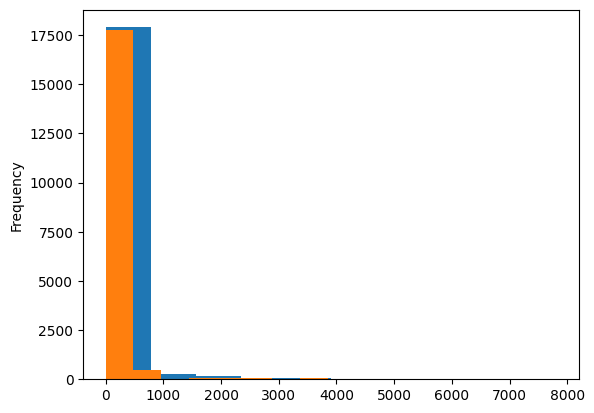

In [13]:
all_data_no_dupes["host_total_listings_count"].plot.hist()
all_data_no_dupes["host_listings_count"].plot.hist()

**host_listings_count and host_total_listings_count appear to be the same

In [14]:
# Drop one of the above variables in the chart
eda_subset = all_data_no_dupes.drop(
    columns = ["scrape_id", "listing_url", "host_id", "host_url", "host_name", 
               "host_since", "host_location", "host_about", "host_response_time", 
               "host_response_rate", "host_acceptance_rate", "host_is_superhost", 
               "host_thumbnail_url", "host_picture_url", "host_verifications",
               "host_has_profile_pic", "host_identity_verified"], 
    axis = 1
)

In [15]:
# Descriptive Statistics of a Select Subset of Features
eda_subset.describe().T

,count,mean,min,25%,50%,75%,max,std
id,18627.0,244970506009365984.0,6.0,29943733.0,49818439.0,628769716496820864.0,853653678315646848.0,333476445445733504.0
scrape_id,18627.0,20227422574530.816406,20220615002624.0,20221224045303.0,20230324234210.0,20230324234210.0,20230324234210.0,4340641466.08109
last_scraped,18627,2023-01-27 14:34:06.706393856,2022-06-15 00:00:00,2022-12-24 00:00:00,2023-03-25 00:00:00,2023-03-25 00:00:00,2023-03-25 00:00:00,NaN
host_listings_count,18576.0,84.257321,0.0,1.0,4.0,20.0,4807.0,374.064936
host_total_listings_count,18576.0,121.971307,0.0,2.0,5.0,29.0,7816.0,525.94779
neighbourhood_group_cleansed,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,18627.0,32.763184,32.51986,32.718332,32.75485,32.798349,33.12569,0.092287
longitude,18627.0,-117.172498,-117.28258,-117.246039,-117.16462,-117.129225,-116.89656,0.073437
accommodates,18627.0,4.815483,0.0,2.0,4.0,6.0,16.0,3.168323
bathrooms,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Missing Values Evaluation

In [16]:
# Examine Which Features Have Missing Values
eda_subset.isnull().sum().to_frame(name = "Missing_Value_Count").query("Missing_Value_Count > 0")

,Missing_Value_Count
description,138
neighborhood_overview,6735
host_neighbourhood,2449
host_listings_count,51
host_total_listings_count,51
neighbourhood,6735
neighbourhood_group_cleansed,18627
bathrooms,18627
bathrooms_text,6
bedrooms,1538


In [17]:
# Look at columns with missing values for every record
eda_subset.isnull().sum().to_frame(name = "Missing_Value_Count").query("Missing_Value_Count == 18627")

,Missing_Value_Count
neighbourhood_group_cleansed,18627
bathrooms,18627
calendar_updated,18627


3 columns, _neighbourhood_group_cleansed_, _bathrooms_, and _calendar_updated_, are missing values for every single row. While, _neighbourhood_group_cleansed_ and _calendar_updated_ may be dropped, as their information is not especially key to determining price, the number of _bathrooms_ is key.

_bathrooms_text_ is a text version of the the numerical bathrooms column. _Bathrooms_text_ can be used to fill the missing values for _bathrooms_.

### Filling _bathrooms_ Missing Values with Values from _bathrooms_text_

In [18]:
# Sample of text data used to fill numerical field
eda_subset[["bathrooms", "bathrooms_text"]].head(5)

,bathrooms,bathrooms_text
8853,NaN,2 baths
8839,NaN,1.5 baths
8838,NaN,1 bath
8819,NaN,1 private bath
8823,NaN,1 private bath


In [19]:
# Function to extract integers and floats from text
def bath_number(text):
    try:
        num_baths = re.search("[\d.]", text).group()
        # Returns integer or float
        return num_baths
    except:
        # If no value could be returned
        # Return a missing value placeholder
        return np.nan

# Apply function to bathroom_text column to fill bathrooms column
eda_subset["bathrooms"] = eda_subset["bathrooms_text"].apply(
    lambda x: bath_number(x)
)


In [20]:
# Assess bathroom values that could not be filled
eda_subset[eda_subset["bathrooms"].isnull()]["bathrooms_text"].value_counts()
# Text descriptions that do not contain numerical text will have to be filled manually

bathrooms_text
Private half-bath    69
Half-bath            16
Shared half-bath      6
Name: count, dtype: int64

In [31]:
# Fill missing bathroom values based on text values
eda_subset.loc[eda_subset["bathrooms_text"] == "Private half-bath", ["bathrooms"]] = 0.5
eda_subset.loc[eda_subset["bathrooms_text"] == "Half-bath", ["bathrooms"]] = 0.5
eda_subset.loc[eda_subset["bathrooms_text"] == "Shared half-bath", ["bathrooms"]] = 0.5

In [38]:
# After imputing the bathroom values with _bathroom_text_,
# Only 6 missing values for bathrooms remain
eda_subset["bathrooms"].isnull().sum()

6

## EDA by Property Type

In [20]:
all_data_no_dupes["property_type"].value_counts()

property_type
Entire home                          5113
Entire rental unit                   3742
Entire condo                         2839
Private room in home                 1465
Entire guesthouse                     799
                                     ... 
Castle                                  1
Shared room in boutique hotel           1
Shared room                             1
Houseboat                               1
Shared room in religious building       1
Name: count, Length: 81, dtype: int64